# WORKFLOW :
Load Data

Check Missing Values ( If Exist ; Fill each record with mean of its feature )


Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).


Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh 

(check by experiment).


Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)


Train the Model with Epochs (100) and validate it


If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout 

layer or add Regularizer according to the need .


Evaluation Step


Prediction 

# first step : Load all the necessary libraries

In [194]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

In [195]:
from sklearn.model_selection import train_test_split

# second step :load data

In [196]:
dataframe = pd.read_csv(r"C:\Users\Waleed\Desktop\data analysis\Deep learning\compresive_strength_concrete assignment  1.csv")

In [197]:
#print (dataframe)
#dataframe
#display(dataframe)

# Check Missing Values ( If Exist ; Fill each record with mean of its feature )

In [203]:
dataframe.head()# checking data proper clearly

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [204]:
dataframe.head().isnull()#isnull new DataFrame with True & False data 

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [205]:
dataframe.isnull().sum().sum()#they function how many NaN in your data "the DataFrame returned by isnull() will give the count of total NaN in dataframe".

0

In [206]:
dataframe.isnull().sum()#if i one remove sum() the DataFrame returned by isnull() will give a series containing data about count of NaN 

cement              0
blast               0
flyash              0
water               0
superplasticiser    0
coarse              0
fine                0
age                 0
ccs                 0
dtype: int64

In [202]:
dataframe.columns=["cement","blast","flyash","water","superplasticiser","coarse","fine","age","ccs"]#change its columns name


In [106]:
dataframe.index

RangeIndex(start=0, stop=1030, step=1)

In [207]:
dataframe

,cement,blast,flyash,water,superplasticiser,coarse,fine,age,ccs
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [108]:
col = list(dataframe.columns)#changen all data conver into NaN values 
for i in col:
    dataframe[i]=(dataframe[i]-dataframe[i].mean())/dataframe[i].std(ddof=0)
#dataframe.head()
#print (dataframe)
#display(dataframe)
#dataframe
#dataframe.cement
#col
#dataframe[i].mean

In [173]:
#plt.hist(dataframe)#hist function show graph and array and take time

# feature

In [208]:
target=dataframe.age
features=dataframe.drop("ccs", axis = 1)
#features=dataframe.drop("ccs",axis = 1)#axis must be 1 always Remove rows or columns by specifying label names
# specifying directly index or column names.


In [209]:
print (target)
features

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: age, Length: 1030, dtype: int64


,cement,blast,flyash,water,superplasticiser,coarse,fine,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


# Step 3 :  Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

In [210]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size = 0.2,train_size = 0.8)#yaha sa kr na hai


#X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2)

#X_train.head()

# check number of len

In [211]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

824
206
824
206


# check  number in shape

In [212]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


# step 4 
## Model : input Layer (No. of features )

## 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh

In [213]:
from tensorflow.keras.models import Sequential # its use densly connected layers
from tensorflow.keras.layers import Dense # dense function first create array
from tensorflow.keras.layers import Activation# activation function built in "relu"


In [214]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [215]:
from tensorflow.keras.models import Sequential # its use densly connected layers
from tensorflow.keras.layers import Dense # dense function first create array
from tensorflow.keras.layers import Activation# activation function built in "relu"
#encoded_y_test

In [216]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Step : 5     

# Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

In [220]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step : 6 Train the Model with Epochs (100) and validate it


## If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer     or add regularizer according to the need


In [221]:
# model.fit(X_train, y_train, epochs=100, shuffle=True, verbose =1)
#model.fit(X_train, y_train, epochs=100, batch_size=10)

model.fit(x_train, y_train,epochs=100,batch_size=128,validation_split=0.2)

Train on 659 samples, validate on 165 samples
Epoch 1/100
659/659 [==============================] - 2s 2ms/sample - loss: -5.2675 - accuracy: 0.0000e+00 - val_loss: -5.7241 - val_accuracy: 0.0061
Epoch 2/100
659/659 [==============================] - 0s 156us/sample - loss: -8.9456 - accuracy: 0.0000e+00 - val_loss: -8.6410 - val_accuracy: 0.0061
Epoch 3/100
659/659 [==============================] - 0s 209us/sample - loss: -12.6670 - accuracy: 0.0000e+00 - val_loss: -11.6906 - val_accuracy: 0.0061
Epoch 4/100
659/659 [==============================] - 0s 143us/sample - loss: -16.6913 - accuracy: 0.0000e+00 - val_loss: -14.8660 - val_accuracy: 0.0061
Epoch 5/100
659/659 [==============================] - 0s 111us/sample - loss: -20.9421 - accuracy: 0.0000e+00 - val_loss: -18.2004 - val_accuracy: 0.0061
Epoch 6/100
659/659 [==============================] - 0s 91us/sample - loss: -25.1325 - accuracy: 0.0000e+00 - val_loss: -21.8587 - val_accuracy: 0.0061
Epoch 7/100
659/659 [==========

Epoch 53/100
659/659 [==============================] - 0s 62us/sample - loss: -1507.8062 - accuracy: 0.0000e+00 - val_loss: -1190.7045 - val_accuracy: 0.0061
Epoch 54/100
659/659 [==============================] - 0s 58us/sample - loss: -1588.9166 - accuracy: 0.0000e+00 - val_loss: -1255.6576 - val_accuracy: 0.0061
Epoch 55/100
659/659 [==============================] - 0s 59us/sample - loss: -1675.9499 - accuracy: 0.0000e+00 - val_loss: -1323.4090 - val_accuracy: 0.0061
Epoch 56/100
659/659 [==============================] - 0s 68us/sample - loss: -1763.8053 - accuracy: 0.0000e+00 - val_loss: -1394.0464 - val_accuracy: 0.0061
Epoch 57/100
659/659 [==============================] - 0s 52us/sample - loss: -1858.3110 - accuracy: 0.0000e+00 - val_loss: -1463.9768 - val_accuracy: 0.0061
Epoch 58/100
659/659 [==============================] - 0s 59us/sample - loss: -1950.4476 - accuracy: 0.0000e+00 - val_loss: -1537.3792 - val_accuracy: 0.0061
Epoch 59/100
659/659 [========================

# Evaluation Step

In [222]:
#accuracy = model.evaluate(features,target)
model.evaluate(X_test, Y_test)[1]
#print('acc: %.2f' % (accuracy*100))

206/206 [==============================] - 0s 1ms/sample - loss: 43227.2703 - accuracy: 0.0000e+00


0.0

In [223]:
dataframe.values

array([[540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  79.99],
       [540.  ,   0.  ,   0.  , ..., 676.  ,  28.  ,  61.89],
       [332.5 , 142.5 ,   0.  , ..., 594.  , 270.  ,  40.27],
       ...,
       [148.5 , 139.4 , 108.6 , ..., 780.  ,  28.  ,  23.7 ],
       [159.1 , 186.7 ,   0.  , ..., 788.9 ,  28.  ,  32.77],
       [260.9 , 100.5 ,  78.3 , ..., 761.5 ,  28.  ,  32.4 ]])

# Prediction

In [224]:
from sklearn import ensemble
from sklearn.metrics import r2_score

In [225]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

In [226]:
clf = ensemble.GradientBoostingRegressor(**params)

In [227]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [228]:
print(r2_score(y_test, clf.predict(X_test)))

0.9999567259927287


In [229]:
import seaborn as sns

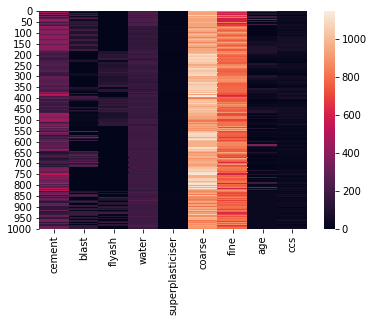

In [230]:
sns.heatmap(dataframe)